In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
import plotly.express as px

### Описание данных
#### olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей<br>
customer_id — позаказный идентификатор пользователя<br>
customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта) <br>
customer_zip_code_prefix —  почтовый индекс пользователя<br>
customer_city —  город доставки пользователя<br>
customer_state —  штат доставки пользователя<br>

#### olist_orders_dataset.csv —  таблица заказов
order_id —  уникальный идентификатор заказа (номер чека)<br>
customer_id —  позаказный идентификатор пользователя<br>
order_status —  статус заказа<br>
order_purchase_timestamp —  время создания заказа<br>
order_approved_at —  время подтверждения оплаты заказа<br>
order_delivered_carrier_date —  время передачи заказа в логистическую службу<br>
order_delivered_customer_date —  время доставки заказа<br>
order_estimated_delivery_date —  обещанная дата доставки<br>

#### olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
order_id —  уникальный идентификатор заказа (номер чека)<br>
order_item_id —  идентификатор товара внутри одного заказа<br>
product_id —  ид товара (аналог штрихкода)<br>
seller_id — ид производителя товара<br>
shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике<br>
price —  цена за единицу товара<br>
freight_value —  вес товара<br>

#### Уникальные статусы заказов в таблице olist_orders_dataset:

created —  создан<br>
approved —  подтверждён<br>
invoiced —  выставлен счёт<br>
processing —  в процессе сборки заказа<br>
shipped —  отгружен со склада<br>
delivered —  доставлен пользователю<br>
unavailable —  недоступен<br>
canceled —  отменён<br>

In [2]:
customers_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-c/first_project/olist_customers_dataset.csv')
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-c/first_project/olist_orders_dataset(1).csv',\
                     parse_dates=['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date', \
                                     'order_delivered_customer_date', 'order_estimated_delivery_date'])
order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-c/first_project/olist_order_items_dataset (3).csv', \
                          parse_dates=['shipping_limit_date'])
# Считываем данные

##### Проверяем данные на соответствие типам, пропущенные значения и дубликаты

In [3]:
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers_data.shape

(99441, 5)

In [5]:
customers_data.dtypes  # типы данных соответствуют

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
customers_data.isna().sum() # нет пропушенных значений

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
customers_data[customers_data.duplicated()] # нет дубликатов

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [9]:
orders.shape

(99441, 8)

In [10]:
orders.dtypes # колонки с датами считались пр загрузке

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [11]:
orders.isna().sum() # не все заказы были оплачены и доставлены

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
orders[orders.duplicated()] # нет дубликатов

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [13]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
order_items.shape

(112650, 7)

In [15]:
order_items.dtypes # колонка с датами считалась пр загрузке

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [16]:
order_items.isna().sum() # нет пропушенных значений

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [17]:
order_items[order_items.duplicated()] # нет дубликатов

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


##### Получаем 3 датафрейма: customers_data - информация о пользователях, orders - информация о заказах, order_items - информация о товарах в заказах

### 1. Сколько у нас пользователей, которые совершили покупку только один раз?<br>
Для этого нужно взять уникальный  идентификатор пользователя и посчитать количество заказов для каждого пользователя.<br>  Объединяем customers_data и orders по custome_id.<br>
Далее нужно выбрать только покупки. На мой взгляд, покупка - это заказ со статусом delivered.<br>
Во всех остальных случаях возможна отмена операции.<br>
Группируем по уникальному id, считаем заказы и выбираем только тех пользователей, у которых по одному заказу.<br>
Мой ответ - 90557 пользователей.<br>

In [18]:
customers_orders = customers_data.merge(orders, on = 'customer_id')
customers_orders = customers_orders.dropna() # убираем пропуски

In [19]:
customers_one_order = customers_orders.query('order_status == "delivered"').groupby('customer_unique_id', as_index=False).agg({'order_id':'count'}).\
query('order_id == 1').shape[0]
customers_one_order

90536

### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?<br>
Используем только таблицу orders. Считаем количество недоставленных заказов по месяцам, затем среднее в месяц. 
Недоставленными считаем заказы со статусами canceled и unavailable.<br>
В среднем 26 заказов в месяц отменяется и 29 недоступны.

In [20]:
undelivered_orders = orders.query('order_status == "canceled" or order_status == "unavailable"')
undelivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05


In [21]:
undelivered_orders.shape

(1234, 8)

In [22]:
undelivered_orders_by_month = undelivered_orders.groupby([undelivered_orders['order_purchase_timestamp'].dt.to_period('M'), 'order_status'])\
.agg({'order_id': 'count'}).reset_index().rename(columns={'order_purchase_timestamp': 'month', 'order_id': 'undelivered_orders'})


In [23]:
undelivered_orders_by_month

,month,order_status,undelivered_orders
0,2016-09,canceled,2
1,2016-10,canceled,24
2,2016-10,unavailable,7
3,2017-01,canceled,3
4,2017-01,unavailable,10
5,2017-02,canceled,17
6,2017-02,unavailable,45
7,2017-03,canceled,33
8,2017-03,unavailable,32
9,2017-04,canceled,18


In [24]:
undelivered_orders_by_status = undelivered_orders_by_month.groupby('order_status', as_index=False).agg({'undelivered_orders':'mean'}).round()
undelivered_orders_by_status

,order_status,undelivered_orders
0,canceled,26.0
1,unavailable,29.0


### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.
Для это объединяем 2 датафрейма (с доставленными заказами и с информацией о товарах) по order_id.<br>
Покупкой считаем все товары, кроме статуса canceled и unavailable.<br>

In [25]:
purchases = orders.query('order_status != "canceled" and order_status != "unavailable"').merge(order_items, on = 'order_id')
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [26]:
purchases['weekday']=purchases['order_purchase_timestamp'].dt.strftime('%A') # добавляем колонку с днем недели

In [27]:
product_order_num = purchases.groupby(['product_id', 'weekday'], as_index=False)\
    .agg({'order_id':'count'}).sort_values('order_id', ascending=False)\
    .rename(columns={'order_id':'orders_number'})
product_order_num
# Делаем группировку по продукту и дню недели

,product_id,weekday,orders_number
15815,422879e10f46682990de24d770e7f83d,Wednesday,93
36311,99a4788cb24856965c36a24e339b6058,Monday,92
40825,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
40821,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
40826,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85
...,...,...,...
23892,64315bd8c0c47303179dd2e25b579d00,Saturday,1
23897,6432d844f2be41bb6f2fd279e23415da,Friday,1
23899,6435535083cf42eb1ce5d96f2c4d3482,Tuesday,1
23900,6435be64ad92f52631170f9a92718a99,Sunday,1


In [28]:
 product_order_max = product_order_num.groupby ('product_id', as_index=False)\
    .agg({'orders_number': 'max'})\
    .sort_values ('orders_number', ascending=False)\
    .rename(columns={'orders_number':'max_order_num'})
product_order_max
 # Делаем группировку товаров по максимальному количеству заказов 

,product_id,max_order_num
8554,422879e10f46682990de24d770e7f83d,93
19599,99a4788cb24856965c36a24e339b6058,92
21959,aca2eb7d00ea1a7b8ebd4e68314663af,89
10789,53b36df67ebb7c41585e8d54d6772e08,76
7314,389d119b48cf3043d311335e499d9c6b,67
...,...,...
12674,62b0aaa3af54c1599523aa7505ac5216,1
12673,62b07aff118f62756ee579afeedc3eb0,1
12672,62ae6a8f5789aec14529a277c7516def,1
12670,62abef05dddbd149514e4339c84f7d7d,1


In [29]:
final_product = product_order_num.merge(product_order_max, on='product_id')
final_product
# Объединяем 2 датафрейма

,product_id,weekday,orders_number,max_order_num
0,422879e10f46682990de24d770e7f83d,Wednesday,93,93
1,422879e10f46682990de24d770e7f83d,Thursday,79,93
2,422879e10f46682990de24d770e7f83d,Friday,77,93
3,422879e10f46682990de24d770e7f83d,Tuesday,67,93
4,422879e10f46682990de24d770e7f83d,Monday,64,93
...,...,...,...,...
60885,642e125cbc752b4eeb8faf442319c39f,Thursday,1,1
60886,6432d844f2be41bb6f2fd279e23415da,Friday,1,1
60887,6435535083cf42eb1ce5d96f2c4d3482,Tuesday,1,1
60888,6435be64ad92f52631170f9a92718a99,Sunday,1,1


In [30]:
result  = final_product.query('orders_number == max_order_num')
# Оставляем только дни недели, в которые количество заказов максимально

In [31]:
result.groupby('product_id', as_index=False).agg({'weekday': pd.Series.mode})

,product_id,weekday
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32724,fff6177642830a9a94a0f2cba5e476d1,"[Saturday, Sunday]"
32725,fff81cc3158d2725c0655ab9ba0f712c,Monday
32726,fff9553ac224cec9d15d49f5a263411f,Friday
32727,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?
Используем предыдущий объединенный датафрейм с  пользователями и действиями. Пкупками считаем доставленнные заказы.

In [32]:
 # Выясним масимальную и минимальную даты совершенных покупок
customers_orders.query('order_status == "delivered"').order_purchase_timestamp.min()

Timestamp('2016-09-15 12:16:38')

In [33]:
customers_orders.query('order_status == "delivered"').order_purchase_timestamp.max()
# Сентябрь 2016 и август 2018 - неполные месяцы.

Timestamp('2018-08-29 15:00:37')

In [34]:
customers_orders['purchase_month'] = customers_orders['order_purchase_timestamp'].dt.to_period('M')
# Добавляем колонки с месяцами

In [35]:
 # Посчитаем кол-во покупок на уникального покупателя в месяц по годам
customers_orders_by_month = customers_orders.groupby(['customer_unique_id', 'purchase_month'], as_index = False) \
    .agg({'order_id': 'count'})
customers_orders_by_month

,customer_unique_id,purchase_month,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
95172,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
95173,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
95174,ffff371b4d645b6ecea244b27531430a,2017-02,1
95175,ffff5962728ec6157033ef9805bacc48,2018-05,1


In [36]:
customers_orders_by_month['weeks_num'] = round(customers_orders_by_month.purchase_month\
    .apply(lambda x: (calendar.monthrange(x.year, x.month)[1]/7)), 2)
# Добавим колонку с количеством недель в месяце

In [37]:
customers_orders_by_month

,customer_unique_id,purchase_month,order_id,weeks_num
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.43
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.43
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.43
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.43
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.29
...,...,...,...,...
95172,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,4.29
95173,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,4.43
95174,ffff371b4d645b6ecea244b27531430a,2017-02,1,4.00
95175,ffff5962728ec6157033ef9805bacc48,2018-05,1,4.43


In [38]:
customers_orders_by_month = customers_orders_by_month.sort_values('purchase_month') # Сортируем п месяцам

In [39]:
# Подкорректируем количество дней в крайних месяцах.
# Сентябрь 2016 - 16 дней
customers_orders_by_month.loc[customers_orders_by_month.purchase_month == '2016-09', 'weeks_num'] = 16/7

In [40]:
# Август 2018 - 29 дней
customers_orders_by_month.loc[customers_orders_by_month.purchase_month == '2018-08', 'weeks_num'] = 29/7

In [41]:
customers_orders_by_month['orders_by_week'] = (customers_orders_by_month.order_id/customers_orders_by_month.weeks_num).round(2)

In [42]:
customers_orders_by_month

,customer_unique_id,purchase_month,order_id,weeks_num,orders_by_week
48807,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,1,2.285714,0.44
17377,2e92a624a8a3f8ab5eb51d42fca60e5b,2016-10,1,4.430000,0.23
12740,221234182f828fb9f2a4ba9c89874ede,2016-10,1,4.430000,0.23
65948,b10f780a5e22a8c7fbce07bb3da6eeff,2016-10,1,4.430000,0.23
64444,ad1cb06f09b27e4773870d1f76a68557,2016-10,1,4.430000,0.23
...,...,...,...,...,...
25756,452cbe60d90609f553b9a2be5b3f69fe,2018-08,1,4.142857,0.24
25727,451b44fd38ecf487d6c8d4ad58d0b758,2018-08,1,4.142857,0.24
25714,4512070eeda071f62cde3a31ded19f8e,2018-08,1,4.142857,0.24
25851,456f2c2a14db922638589f0e4d75ff1b,2018-08,1,4.142857,0.24


### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту # с самым высоким retention на 3-й месяц. 
Работаем с объединенным customers_orders. Покупкой считаем доставленные товары.

In [43]:
purchased_orders = customers_orders.query("order_status == 'delivered'")

In [44]:
purchased_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11


In [45]:
purchased_orders = purchased_orders[['customer_unique_id', 'purchase_month']]
purchased_orders.head()
# Оставим только стобец с иднтификтором пользователя и месяцем покупки.

,customer_unique_id,purchase_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07


In [46]:
purchased_orders.head()

,customer_unique_id,purchase_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07


In [47]:
# вычисляем месяц первого заказа.
first_orders = purchased_orders.groupby('customer_unique_id', as_index=False).agg({'purchase_month': 'min'})\
.rename(columns={'purchase_month':'first_order'}).sort_values('first_order')
first_orders.head()

,customer_unique_id,first_order
47873,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09
68393,bb5f2d03e1e945a1e5c1ab23c3de4c64,2016-10
28554,4e23e1826902ec9f208e8cc61329b494,2016-10
84193,e6a1d274cbba12da4cd29eb462b34be5,2016-10
14598,27ede105a6042b71a261bf57f75fdcf8,2016-10


In [48]:
# Объединяем информацию по заказам с месяцем первого заказа.

In [49]:
cohorts = purchased_orders.merge(first_orders, on = 'customer_unique_id')
cohorts.head()

,customer_unique_id,purchase_month,first_order
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07,2018-07


In [50]:
# Отбираем заказы с января по декабрь 2017
cohorts = cohorts.query('first_order >= "2017-01" & first_order <= "2017-12"')

In [51]:
# Вычисляем разницу между заказом и первым заказом в месяцах.
def difference (x):
    d1 = x['purchase_month']
    d2 = x["first_order"]
    return ((d1.year - d2.year) * 12 + d1.month - d2.month)

cohorts['difference'] = cohorts.apply(lambda x: difference(x), axis=1)

In [52]:
cohorts

,customer_unique_id,purchase_month,first_order,difference
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05,0
5,4c93744516667ad3b8f1fb645a3116a4,2017-09,2017-09,0
6,4c93744516667ad3b8f1fb645a3116a4,2017-10,2017-09,1
8,57b2a98a409812fe9618067b6b8ebe4f,2017-11,2017-11,0
12,2a7745e1ed516b289ed9b29c7d0539a5,2017-11,2017-11,0
...,...,...,...,...
96444,277490f0d435b602fe4475d4b89e9181,2017-05,2017-05,0
96447,e7f8760e2bbd2f1986bebd99596c088e,2017-03,2017-03,0
96449,4b5820135d360a45552b5163835b1d89,2017-12,2017-12,0
96453,73c2643a0a458b49f58cea58833b192e,2017-11,2017-11,0


In [53]:
# Делаем группировку по первому заказу и разнице в месяцах. Считаем количество пользователей.
users_num_cohorts = cohorts.groupby([cohorts['first_order'], 'difference'])\
.agg({'customer_unique_id':'count'}).reset_index()
users_num_cohorts.head()

,first_order,difference,customer_unique_id
0,2017-01,0,747
1,2017-01,1,2
2,2017-01,2,2
3,2017-01,3,1
4,2017-01,4,3


In [54]:
# Разворачиваем таблицу, созадем колонку с ретеншн на 3-й месяц.
pivot_cohorts = users_num_cohorts.pivot(index='first_order', columns = 'difference', values = 'customer_unique_id')
pivot_cohorts['retention3month'] = pivot_cohorts.iloc[:, 3]/pivot_cohorts.iloc[:, 0]*100
pivot_cohorts

difference,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,retention3month
first_order,,,,,,,,,,,,,,,,,,,,
2017-01,747.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,0.133869
2017-02,1639.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,0.122026
2017-03,2541.0,12.0,9.0,12.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN,0.472255
2017-04,2284.0,15.0,6.0,5.0,6.0,6.0,9.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,4.0,NaN,NaN,0.218914
2017-05,3516.0,17.0,16.0,10.0,10.0,12.0,16.0,5.0,9.0,11.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN,NaN,0.284414
2017-06,3092.0,16.0,13.0,13.0,10.0,12.0,11.0,7.0,4.0,6.0,9.0,12.0,5.0,6.0,10.0,NaN,NaN,NaN,NaN,0.420440
2017-07,3820.0,22.0,13.0,9.0,13.0,8.0,12.0,4.0,8.0,11.0,8.0,12.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,0.235602
2017-08,4133.0,29.0,16.0,11.0,14.0,23.0,12.0,11.0,6.0,6.0,10.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.266150
2017-09,4069.0,28.0,22.0,15.0,18.0,13.0,9.0,10.0,11.0,7.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.368641


In [55]:
# Фиксируем данные первого месяца
first_month_values = pivot_cohorts.iloc[:, 0]

In [56]:
# Создаем таблицу retention
retention = round(pivot_cohorts.divide(first_month_values, axis=0)* 100, 2)
retention.drop('retention3month', axis= 1 , inplace= True )
retention

difference,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_order,,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.27,0.27,0.13,0.40,0.13,0.40,0.13,0.13,NaN,0.40,0.13,0.67,0.40,0.13,0.13,0.27,0.40,0.13
2017-02,100.0,0.18,0.31,0.12,0.43,0.12,0.24,0.18,0.06,0.18,0.12,0.31,0.12,0.18,0.12,0.06,0.06,0.18,NaN
2017-03,100.0,0.47,0.35,0.47,0.35,0.16,0.16,0.31,0.31,0.08,0.35,0.12,0.20,0.12,0.16,0.24,0.08,0.12,NaN
2017-04,100.0,0.66,0.26,0.22,0.26,0.26,0.39,0.31,0.31,0.18,0.26,0.09,0.04,0.04,0.09,0.09,0.18,NaN,NaN
2017-05,100.0,0.48,0.46,0.28,0.28,0.34,0.46,0.14,0.26,0.31,0.26,0.34,0.23,0.03,0.17,0.20,NaN,NaN,NaN
2017-06,100.0,0.52,0.42,0.42,0.32,0.39,0.36,0.23,0.13,0.19,0.29,0.39,0.16,0.19,0.32,NaN,NaN,NaN,NaN
2017-07,100.0,0.58,0.34,0.24,0.34,0.21,0.31,0.10,0.21,0.29,0.21,0.31,0.13,0.24,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.70,0.39,0.27,0.34,0.56,0.29,0.27,0.15,0.15,0.24,0.19,0.12,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.69,0.54,0.37,0.44,0.32,0.22,0.25,0.27,0.17,0.25,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
max(retention.loc[ :,3])

0.47

In [58]:
maxValueIndex = retention.loc[ :,3].idxmax(axis=1)

In [59]:
maxValueIndex

Period('2017-03', 'M')

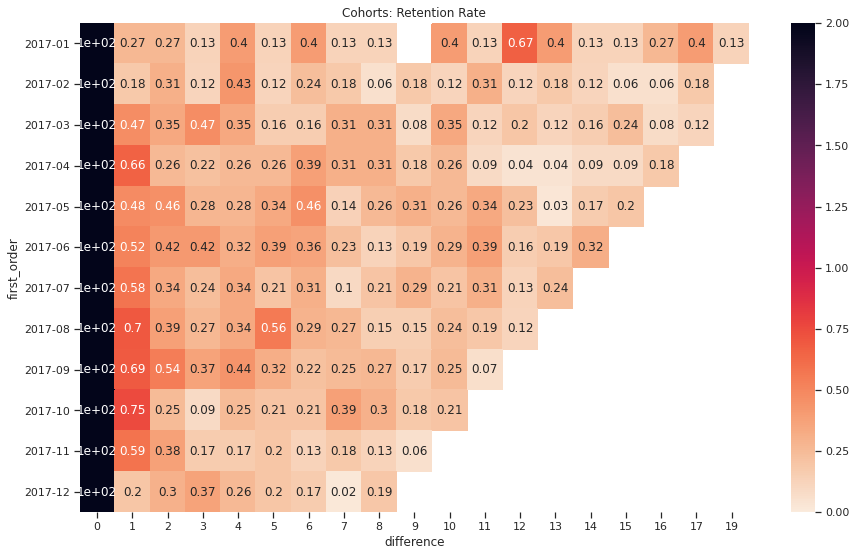

In [60]:
# Визуализруем таблицу retention
cmap = sns.cm.rocket_r
sns.set(style='ticks')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: Retention Rate')
sns.heatmap(retention, annot=True, cmap=cmap, vmin=0, vmax=2, center= 1)

##### Вывод: Самый высокий Retention  за 3-1 месяц у когорты '2017-03' - 0.47%.

### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации.  Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.  В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

In [117]:
# Объединим уже объединенный датасет customers_orders и датасет с товарами.
purchase = customers_orders.merge(order_items, on='order_id')

In [118]:
# Оставим толькоо нужные колонки
purchase = purchase[['order_id', 'customer_unique_id', 'order_purchase_timestamp', 'price']]
purchase

,order_id,customer_unique_id,order_purchase_timestamp,price
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,124.99
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,289.00
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,139.94
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,149.94
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,230.00
...,...,...,...,...
110175,6760e20addcf0121e9d58f2f1ff14298,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,74.90
110176,9ec0c8947d973db4f4e8dcf1fbfa8f1b,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,114.90
110177,fed4434add09a6f332ea398efd656a5c,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,37.00
110178,e31ec91cea1ecf97797787471f98a8c2,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,689.00


In [119]:
# Создаем новую таблицу на основе заказов.
orders = purchase.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id']).agg({'price': lambda x: x.sum()}).reset_index()
orders.head()

,order_id,order_purchase_timestamp,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90


In [120]:
# Устанавливаем сегодняшнюю дату, как дату последнего заказа + 1 день.
NOW = orders['order_purchase_timestamp'].max() +  pd.Timedelta(1, unit='D')
NOW

Timestamp('2018-08-30 15:00:37')

In [121]:
# Создаем колонку с количеством дней от сегодняшнего дня до даты заказа.
orders['DaysSinceOrder'] = orders['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

orders.head()

,order_id,order_purchase_timestamp,customer_unique_id,price,DaysSinceOrder
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90,351
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90,491
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00,228
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99,22
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90,572


In [122]:
# Функции для агрегации.
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # Минимальное кол-во дней от последнего заказа.
    'order_purchase_timestamp': lambda x: len([d for d in x]), # Количесто заказов за весь период
    'price': lambda x: x.sum()
}
rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index() #Группировака по id покапателя.
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency', 'price': 'Monetary'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [123]:
# Разбиваем на 5 категорий по кватилям.
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 92.0, 0.4: 177.0, 0.6: 268.0, 0.8: 382.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [124]:
# Функция для Recency, чем меньше показатель, тем лучше.
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1
# Функция для Суммы покупок, чем больше показатель, тем лучше.
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

###### Для Frequency для всех перцентилей получаем одинаковые значения. Поэтому этот метод не подходит. Метрика Frequency находится в диапазоне от 1 до 11. Примем во внимание большой объем наблюдений и ранжируем следующим образом:
1-3 покупки ранг 1,
3-5 покупок ранг 2,
5-7 покупок ранг 3,
7-9 покупок ранг 4,
9-11 покупок ранг 5

In [134]:
# Применяем функции. Создаем соответствующие колонки.
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [135]:
# Присвоим ранги для Frequency 
intervals_F=[0, 3, 5, 7, 9, 12]
rfm['F']=pd.cut(rfm.Frequency, intervals_F, labels=['1', '2', '3', '4', '5'])

In [136]:
# Объедияем 3 показателя с отдельной колонке.
rfm=rfm.astype({'R':'string', 'F':'string', 'M':'string'})
rfm['RFM_score'] = rfm['R'] + rfm['F'] + rfm['M']
rfm.head(3)

,customer_unique_id,Recency,Frequency,Monetary,R,M,F,RFM_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.9,4,4,1,414,многообещающие
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.9,4,1,1,411,Перспективные
2,0000f46a3911fa3c0805444483337064,537,1,69.0,1,2,1,112,в зоне риска


In [140]:
# Делаем сегментацию пользователей
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [141]:
segt_map = {
    r'[1][1][1]': 'потерянные',
    r'[1-2][1-2][1-2]': 'в зоне риска',
    r'[1][4-5][4-5]': 'не можем потерять',
    r'[1-2][1-5][1-5]': 'клиенты под угрозой',
    r'[2-3][1][1]': 'собираются «уснуть»',
    r'[2-3][2-5][2-5]': 'нуждаются во внимании во внимании',
    r'[3-4][1-2][1-2]': 'перспективные',
    r'[3-4][1-2][3-5]': 'многообещающие',
    r'[4-5][1-2][1-2]': 'недавние',
    r'[3-5][1-4][1-4]': 'потенциально-лояльные',
    r'[3-5][1-2][4-5]': 'лояльные',
    r'[2-5][3-5][3-5]': 'постоянные клиенты',
    r'[4-5][4-5][4-5]': 'лидеры'}

rfm['Segment'] = rfm['Segment'].replace(segment_map, regex=True)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,M,F,RFM_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,4,1,414,многообещающие
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1,411,Перспективные
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,2,1,112,в зоне риска
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211,в зоне риска
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,5,1,215,Клиенты под угрозой
...,...,...,...,...,...,...,...,...,...
93337,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00,1,5,1,115,Клиенты под угрозой
93338,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,3,2,1,312,Перспективные
93339,ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,3,1,113,Клиенты под угрозой
93340,ffff5962728ec6157033ef9805bacc48,119,1,115.00,4,4,1,414,многообещающие


In [142]:
# посчитаем кол-во пользователей в получившихся сегментах и построим график

segments_counts=rfm.groupby('Segment', as_index=False)  \
                .agg({'customer_unique_id':'count'}) \
                .rename(columns={'customer_unique_id':'count_customer'}) \
                .sort_values('count_customer', ascending=False)
segments_counts = segments_counts.query('count_customer >1')
segments_counts

,Segment,count_customer
11,многообещающие,22141
1,Клиенты под угрозой,21359
10,в зоне риска,11739
5,Перспективные,11301
3,Недавние,7656
7,Потенциально-лояльные,7369
8,Потерянные,4107
9,"Те, которые собираются «уснуть»",3965
2,Лояльные,3693
4,Нуждающиеся во внимании,6


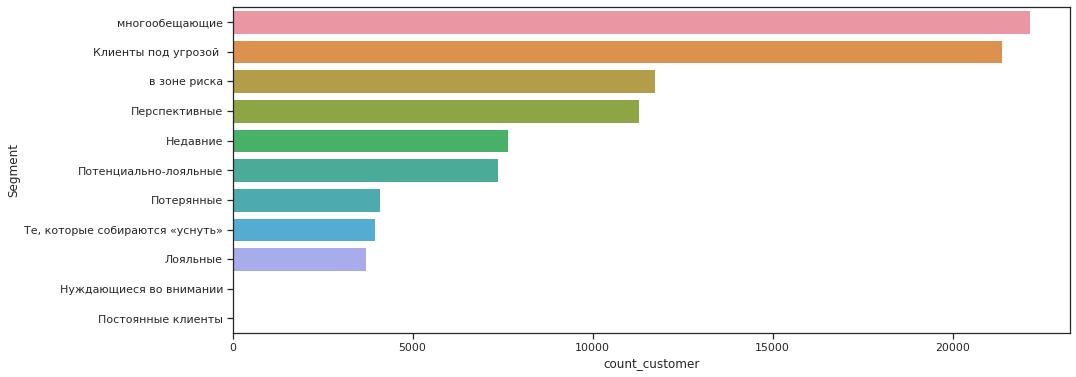

In [139]:
plt.figure(figsize=(15,6))
sns.barplot(x='count_customer', y='Segment', data = segments_counts)